### Reading Data

# ARIMA Example 

In [13]:
#1.Using pmdarima to set ARIMA orders with an information criteria search
#2.Plotting test-set predictions
#3.Plotting future forecasts
#4.Viewing ARIMA model summaries

In [ ]:
pip install scalecast

In [1]:
import pandas as pd
import numpy as np
from scalecast.Forecaster import Forecaster
from scalecast.auxmodels import auto_arima
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(14,7)})

In [2]:
df = pd.read_excel(r"E:\Forecast Vol Analysis_Dutta.xlsx")
f = Forecaster(y=df['y'],current_dates=df['ds'])
f

Forecaster(
    DateStartActuals=2020-08-01T00:00:00.000000000
    DateEndActuals=2022-08-13T00:00:00.000000000
    Freq=W-SAT
    N_actuals=107
    ForecastLength=0
    Xvars=[]
    Differenced=0
    TestLength=1
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    BootstrapSamples=100
    CurrentEstimator=None
    GridsFile=Grids
)

In [3]:
df.shape

(107, 2)

In [4]:
df

,ds,y
0,2020-08-01,19589
1,2020-08-08,143871
2,2020-08-15,117018
3,2020-08-22,115361
4,2020-08-29,190338
...,...,...
102,2022-07-16,108558
103,2022-07-23,128013
104,2022-07-30,116294
105,2022-08-06,153884


In [9]:
df.info

<bound method DataFrame.info of             ds       y
0   2020-08-01   19589
1   2020-08-08  143871
2   2020-08-15  117018
3   2020-08-22  115361
4   2020-08-29  190338
..         ...     ...
102 2022-07-16  108558
103 2022-07-23  128013
104 2022-07-30  116294
105 2022-08-06  153884
106 2022-08-13  132177

[107 rows x 2 columns]>

In [6]:
# Finding missing values
df.isnull().sum()

ds    0
y     0
dtype: int64

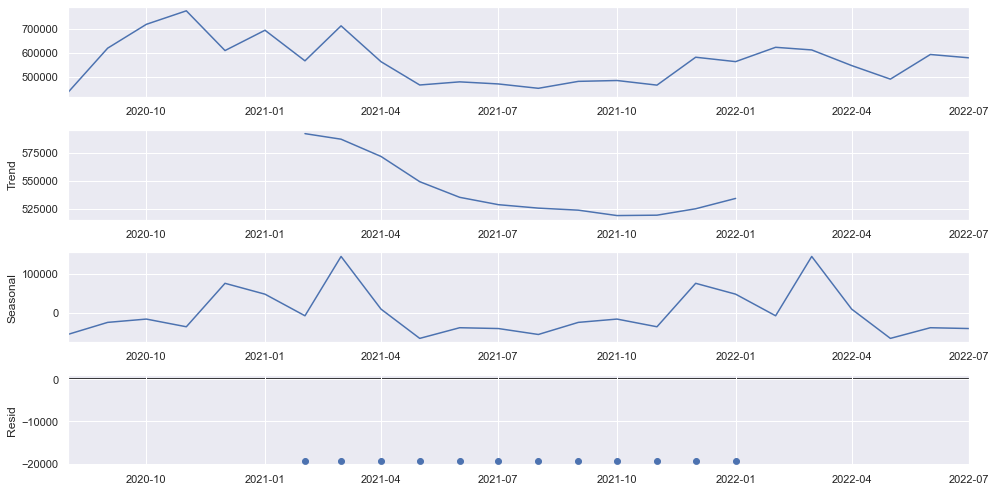

In [4]:
f.seasonal_decompose().plot()
plt.show()

# Auto Arima Approach

In [59]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [5]:
f.generate_future_dates(12)
f.set_test_length(.2)
f.set_estimator('arima')

In [6]:
auto_arima(
    f,
    start_P=1,
    start_q=1,
    max_p=6,
    max_q=6,
    m=12,
    seasonal=True,
    max_P=2, 
    max_D=2,
    max_Q=2,
    max_d=2,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True,
    information_criterion="aic",
    alpha=0.05,
    scoring='mse',
    call_me='auto_arima1',
)

Performing stepwise search to minimize aic
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=213.243, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=216.283, Time=0.05 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=215.795, Time=0.08 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=220.930, Time=0.00 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=215.109, Time=0.03 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=215.144, Time=0.06 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=214.312, Time=0.05 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=214.525, Time=0.01 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=inf, Time=0.09 sec

Best model:  ARIMA(0,0,0)(0,1,0)[12] intercept
Total fit time: 1.046 seconds


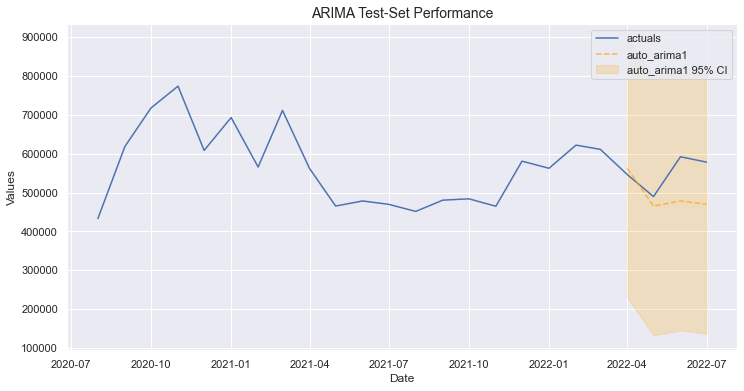

In [7]:
f.plot_test_set(ci=True,models='auto_arima1')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

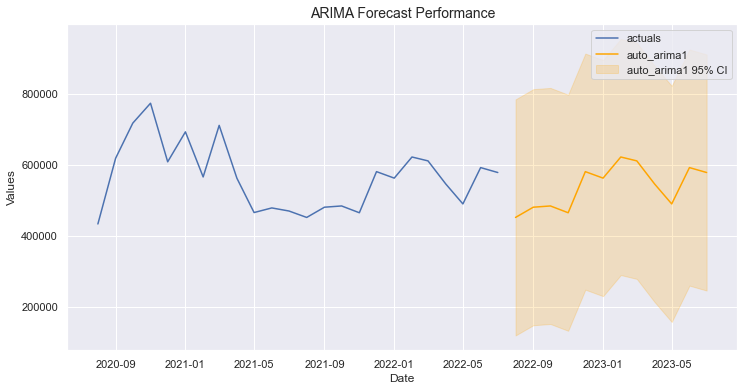

In [8]:
f.plot(ci=True,models='auto_arima1')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

In [9]:
f.regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   24
Model:             ARIMA(0, 1, 0, 12)   Log Likelihood                -160.824
Date:                Sun, 23 Oct 2022   AIC                            323.648
Time:                        00:34:15   BIC                            324.133
Sample:                             0   HQIC                           323.469
                                 - 24                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      9.421e+09   1.78e+09      5.301      0.000    5.94e+09    1.29e+10
===================================================================================
Ljung-Box (L1) (Q):                   2.28   Jarque-Bera (JB):                 0.80
Prob(Q):                              0.13   Prob(JB):                         0.67
Heteroskedasticity (H):               0.15   Skew:                            -0.53
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Export Results

In [10]:
pd.options.display.max_colwidth = 100
results = f.export(to_excel=True,excel_name='auto_arima_results.xlsx',determine_best_by='TestSetMAPE')
summaries = results['model_summaries']
summaries[['ModelNickname','HyperParams','InSampleMAPE','TestSetMAPE']]

,ModelNickname,HyperParams,InSampleMAPE,TestSetMAPE
0,auto_arima1,"{'order': (0, 0, 0), 'seasonal_order': (0, 1, 0, 12), 'trend': None}",0.602852,0.114723


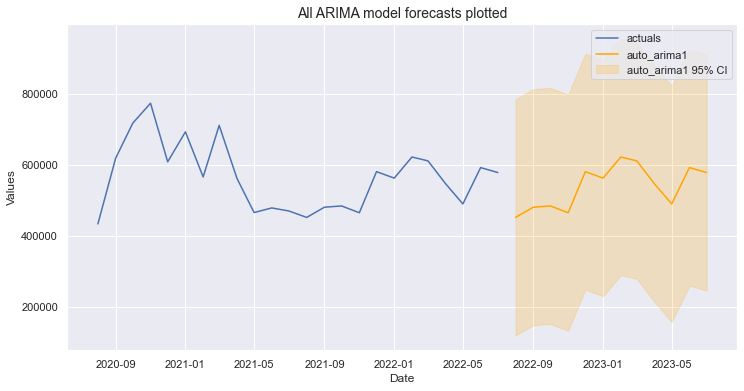

In [11]:
f.plot(ci=True,models=['auto_arima1'],order_by='TestSetMAPE')
plt.title('All ARIMA model forecasts plotted',size=14)
plt.show()